In [1]:
import pandas 

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
weather_data = pd.read_csv(r'D:\ASG_PRJ\Lab\Lab 1\WeatherForecast\Climate Data.csv')

print(weather_data.head())
print(weather_data.columns)

         Date  Average temperature (°F)  Average humidity (%)  \
0  2009-01-01                      37.8                  35.0   
1  2009-01-02                      43.2                  32.0   
2  2009-01-03                      25.7                  60.0   
3  2009-01-04                       9.3                  67.0   
4  2009-01-05                      23.5                  30.0   

   Average dewpoint (°F)  Average barometer (in)  Average windspeed (mph)  \
0                   12.7                    29.7                     26.4   
1                   14.7                    29.5                     12.8   
2                   12.7                    29.7                      8.3   
3                    0.1                    30.4                      2.9   
4                   -5.3                    29.9                     16.7   

   Average gustspeed (mph)  Average direction (°deg)  Rainfall for month (in)  \
0                     36.8                     274.0             

            Average temperature (°F)  Average humidity (%)  \
Date                                                         
2009-01-01                      37.8                  35.0   
2009-01-02                      43.2                  32.0   
2009-01-03                      25.7                  60.0   
2009-01-04                       9.3                  67.0   
2009-01-05                      23.5                  30.0   

            Average dewpoint (°F)  Average barometer (in)  \
Date                                                        
2009-01-01                   12.7                    29.7   
2009-01-02                   14.7                    29.5   
2009-01-03                   12.7                    29.7   
2009-01-04                    0.1                    30.4   
2009-01-05                   -5.3                    29.9   

            Average windspeed (mph)  Average gustspeed (mph)  \
Date                                                           
2009-01-0

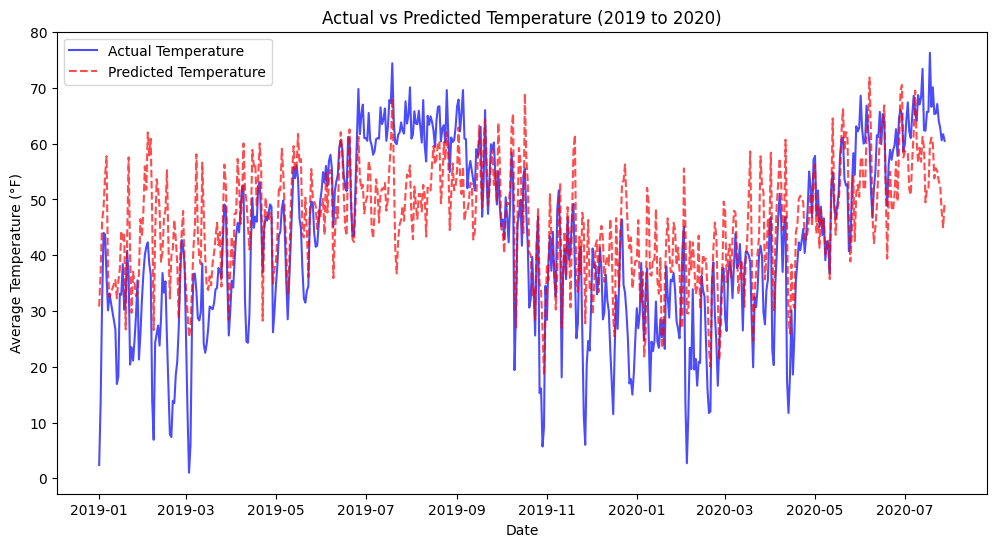

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv(r'D:\ASG_PRJ\Lab\Lab 1\WeatherForecast\Climate Data.csv')

# Convert "Date" column to datetime and set it as the index
data["Date"] = pd.to_datetime(data["Date"])
data.set_index("Date", inplace=True)

# Ensure the data has daily frequency
data = data.asfreq("D")

# Handling missing values (interpolating to fill gaps)
data.interpolate(method='linear', inplace=True)

# Visualize the data structure
print(data.head())

# --- Linear Regression Model ---
# Select features and target variable for the regression model
features = ['Average humidity (%)', 'Average barometer (in)', 'Average windspeed (mph)']
target = 'Average temperature (°F)'

# X contains the features, y contains the target variable (temperature)
X = data[features]
y = data[target]

# Standardize the features to improve model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions using the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# --- Improved Plotting ---
# Option 1: Plot data for a specific year (e.g., 2020)
start_date = '2019'
end_date = '2020'
data_sample = data.loc[start_date:end_date]

# Prepare data for a specific period
X_sample = data_sample[features]
X_sample_scaled = scaler.transform(X_sample)
y_sample = data_sample[target]
y_pred_sample = model.predict(X_sample_scaled)

# Plot the actual vs predicted temperature for 2020
plt.figure(figsize=(12, 6))
plt.plot(data_sample.index, y_sample, label="Actual Temperature", color='b', alpha=0.7)
plt.plot(data_sample.index, y_pred_sample, label="Predicted Temperature", color='r', linestyle='--', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Average Temperature (°F)')
plt.title(f'Actual vs Predicted Temperature ({start_date} to {end_date})')
plt.legend()
plt.show()



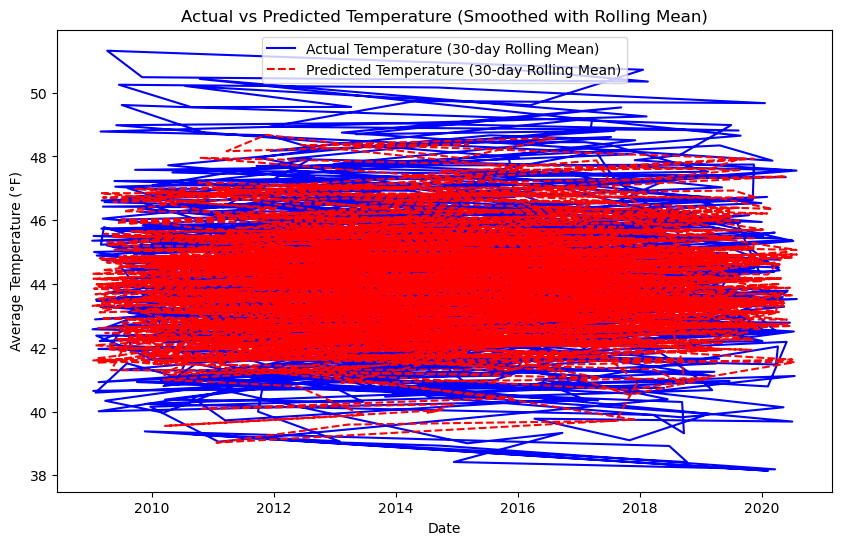

In [69]:
# Option 2: Plot with a rolling mean to smooth out short-term fluctuations (30-day window)
y_test_rolling = y_test.rolling(window=30).mean()
y_pred_rolling = pd.Series(y_pred, index=y_test.index).rolling(window=30).mean()

plt.figure(figsize=(10, 6))
plt.plot(y_test_rolling.index, y_test_rolling, label="Actual Temperature (30-day Rolling Mean)", color='b')
plt.plot(y_pred_rolling.index, y_pred_rolling, label="Predicted Temperature (30-day Rolling Mean)", color='r', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°F)')
plt.title('Actual vs Predicted Temperature (Smoothed with Rolling Mean)')
plt.legend()
plt.show()

#This option doesn't seem good :))

<Figure size 1200x1000 with 0 Axes>

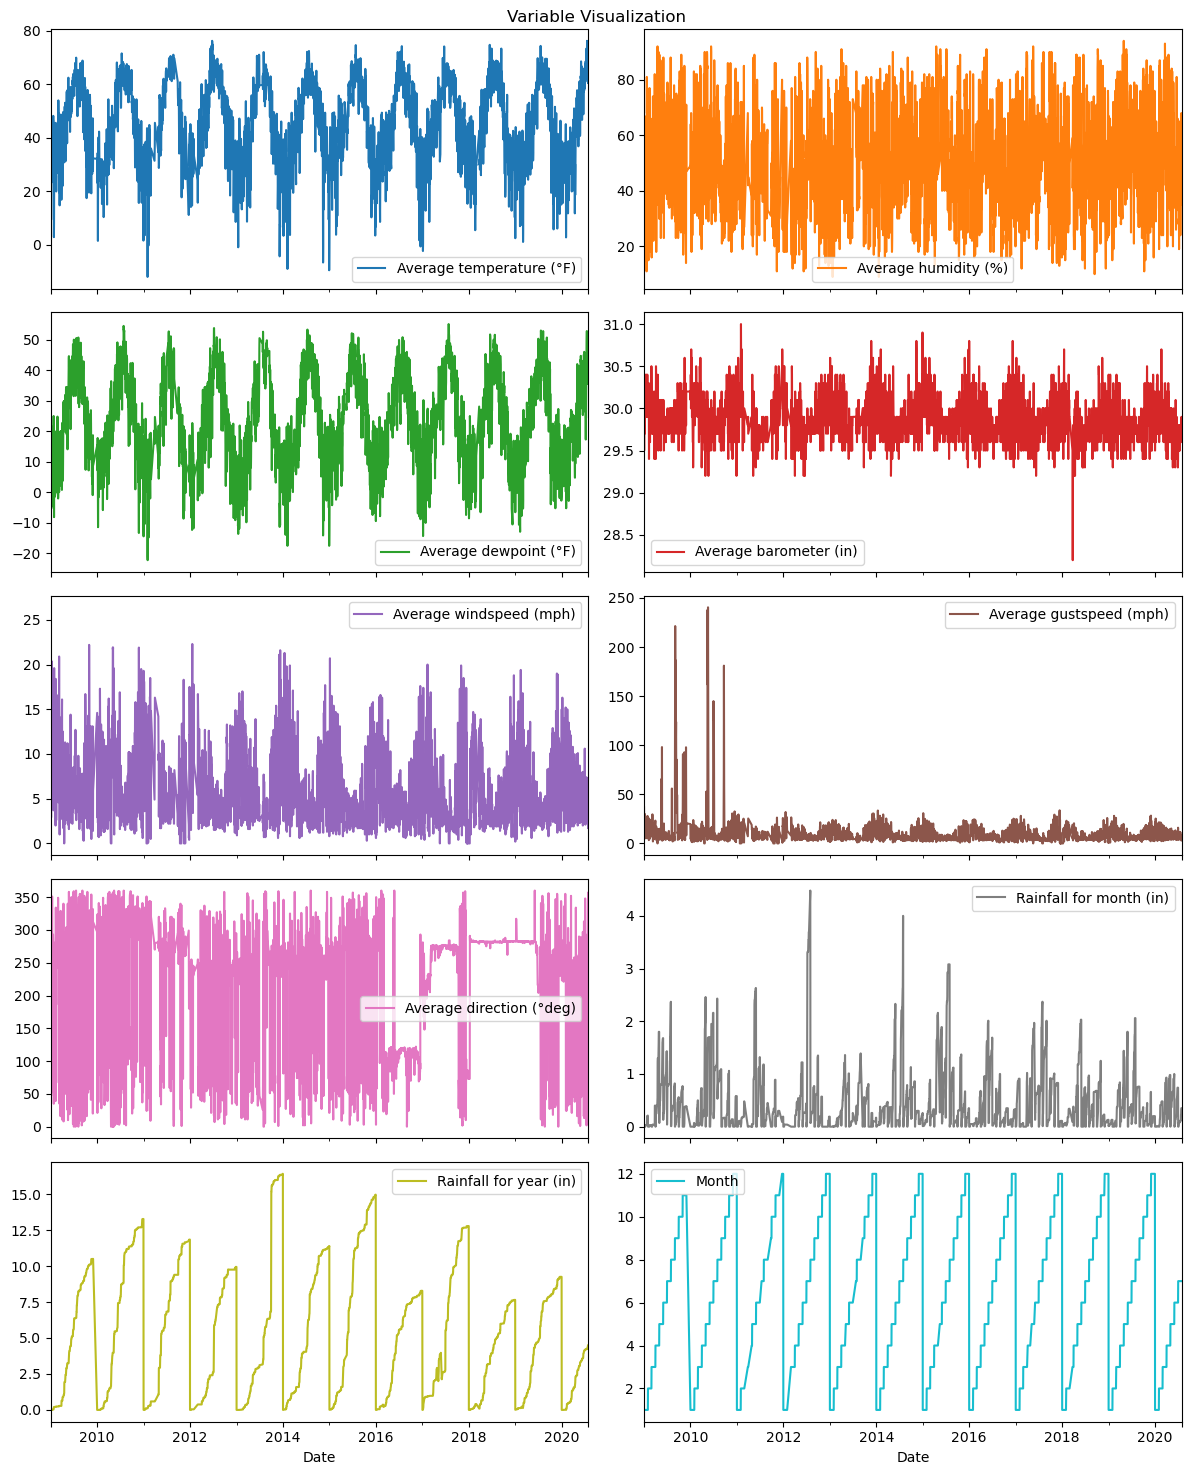

In [71]:
# Option 3: Visualize all variables using subplots (Optional)
num_columns = data.shape[1]
nrows = (num_columns // 2) + (num_columns % 2)

plt.figure(figsize=(12, 10))
data.plot(subplots=True, layout=(nrows, 2), figsize=(12, nrows*3), title="Variable Visualization")
plt.tight_layout()
plt.show()